# TP 3 
Ce TP regroupe le chapitre 5 du cours calcul scientifique. <br>

**Deadline 14 Mai 23h59**

Ce TP est noté sur 15 points répartis comme suit: 
    - Exercice 1: 2 points  
    - Exercice 2: 10 points
    - Qualité du code + commentaires: 1.5 points
    - Qualité des explications et interprétations: 1.5 points
    
    
Suivez attentivement les consignes de chaque exercice. L'utilisation de packages non permis sera pénalisée.

# Exercice 1:

1. Importer la dataset IceCreamData vue en cours
2. Calculer beta1 et beta0 manuellement en suivant les formules (simplifiée bor beta1) vues en cours. Vous devez retrouver les mêmes valeurs du cours

In [1]:
# library imports 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#Import dataset here 
df = pd.read_csv('IceCreamData.csv')
# calculations
x= df['Temperature'] #independent variable
y= df['Revenue']   #dependent variable
x_bar= np.mean(df['Temperature'])
y_bar=np.mean(df['Revenue'])
# standard deviation of X and Y
Sx = np.std(x)
Sy= np.std(y)

# Slope and intercept
beta1=np.sum(np.multiply(np.subtract(x,x_bar),np.subtract(y,y_bar)))/(np.sum(np.square(np.subtract(x,x_bar)))) # slope
beta0 =y_bar -beta1*x_bar
print("beta0 = " ,  beta0,  " and beta1 = " ,beta1)

beta0 =  44.831267090563585  and beta1 =  21.44362551068026


# Exercice 2:

Dans cet exercice l'objectif est de créer et comparer différents modèles de régression linéaire afin d'explorer les relations entre différentes variables. Retrouver les informations sur les différentes variables en consultant le fichier "Data Dictionary" <br>

Les données concernent des voitures. L'objectif est de déterminer le prix d'une voiture à partir de variables concernant les caractéristiques de voitures.

Premièrement, importons les données. pouvez les explorer si vous voulez mais ça ne fait pas partie du travail demandé dans cet exercice. 

In [2]:
import pandas as pd
df= pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
print( df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


## Question 1

Commençons simple! <br>
Pour cette question, nous allons comparer deux modèles de régression linéaire simple (avec une seule variable indépendante. La variable indépendante pour le premier modèle sera 'horsepower'ou la puissance de chevaux de la voiture. La variable indpendante pour le deuxième modèle sera 'enginsize' qui représente la taille de la voiture. 
La variable dépendante sera bien évidemment 'price' qui est le prix de la voiture
1. Visualisez les droites de chaque modèle ainsi que les points des données comme vu en cours (une figure pour chaque droite de régression). Visuellement, quel modèle vous semble meilleur? pourquoi? (1 point)
2. Créez les 2 modèles avec stats models. Que pensez vous maintenant? quel est le meilleur modèle? (1.5 points)
3. Calculez RMSE pour chaque modèle. Les résultats confirment-ils le meilleur modèle? (1.5 points)

In [5]:
# Let's start by creating the two models 

#              model 1 :
x1= df[['horsepower']] #independent variable
y= df['price']       #dependent variable
# istanciating the model
model1 = LinearRegression()
# fitting the model
model1.fit(x1, y)


#              model 2 :
x2= df[['enginesize']] #independent variable
# istanciating the model
model2 = LinearRegression()
# fitting the model
model2.fit(x2, y)


LinearRegression()

Text(0.5, 1.0, 'Price of the cars  based on horse power')

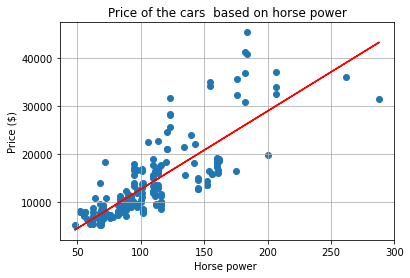

In [6]:
#answer question 1.1 here
#model 1 
plt.scatter(x1, y)
plt.plot(x1 ,model1.predict(x1), color = 'red')
plt.ylabel('Price ($)')
plt.xlabel('Horse power ')
plt.grid()
plt.title ('Price of the cars  based on horse power')


Text(0.5, 1.0, 'Price of the cars  based on engine size')

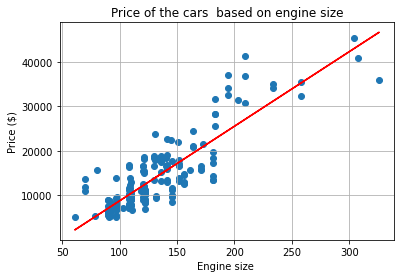

In [7]:
#model 2
plt.scatter(x2, y)
plt.plot(x2 ,model2.predict(x2), color = 'red')
plt.ylabel('Price ($)')
plt.xlabel('Engine size ')
plt.grid()
plt.title ('Price of the cars  based on engine size')

### <font color=blue>Interpretation:</font> 
- Visuallement le modéle 1 prédit bien les valeurs au dessous de 100 horsepower mais pour les valeurs plus élevés les points sont trés loins de la droite de prédiction.
- le modéle 2 semble plus performant que le modéle 1 puisque les points semblent plus proches de la droite de prédiction.

In [8]:
# installation du statsmodels
!pip install statsmodels

You should consider upgrading via the 'c:\users\skander\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [9]:
# question 1.2 model 1 here
import statsmodels.api as sm
# model 1 :
x1 = sm.add_constant(x1)
# instanciating the model
model11 = sm.OLS(y, x1)
#fitting the model
results1= model11.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.48e-48
Time:                        16:07:02   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [10]:
# model 2 :
x2 = sm.add_constant(x2)
# instanciating the model
model22 = sm.OLS(y, x2)
#fitting the model
results2= model22.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.35e-65
Time:                        16:07:02   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

### <font color=blue>Interpretation:</font> 
##### <font color=red> Comparaison avec R-squared :</font> 
- le coefficient de détermination(R-squared) pour le modéle 1 est 0.653, donc 65,3% de la variation des prix des voitures est expliqué par la variation du horsepower.
- le coefficient de détermination(R-squared) pour le modéle 2 est  0.764, donc 76,4% de la variation des prix des voitures est expliqué par la variation de l'enginesize.
##### <font color=red> Comparaison avec F-test :</font> 
- le F-statistic du modéle 1 est de 382.2, alors que le modéle 2 donne une valeur de F-statistic de 657.6.
- le F-test est utilisé pour évaluer l'équation de regression du modéle donc le modéle 2 est plus performant que le modéle 1.


In [11]:
#question 1.3 here
from sklearn.metrics import mean_squared_error

#RMSE -  horsepower 

rmse_1 =  np.sqrt(mean_squared_error(y, results1.predict(x1)))
print('The root mean square error of simple regression model 1 (horse power )  value is: ',rmse_1)

#RMSE -  enginesize 
rmse_2 =  np.sqrt(mean_squared_error(y, results2.predict(x2)))
print('The root mean square error of simple regression model 2 (enginesize)  value is: ',rmse_2)

The root mean square error of simple regression model 1 (horse power )  value is:  4693.880026407783
The root mean square error of simple regression model 2 (enginesize)  value is:  3870.4342657576963


### <font color=blue>Interpretation:</font> 
- Le modéle 1 donne une erreur RMSE égale a 4693,88 alors que le modéle 2 donne une valeur de RMSE égale a 3870.43, les résultats confirment donc que le modéle 2 est le plus performant

## Question 2 
Comme vu en cours les modèle avec une seule variable indépendante ne donnent pas généralement de très bons résultats. C'est pourquoi dans cette question nous allons passer à des modèles multivariables
1. En utilisant stats models créez un modèle ayant les variables indépendantes 'horsepower', 'enginesize' et 'fuel_type' (variable catégorique ayant pour valeur gaz ou diesel) (1 points) 
2. Interprétez les resultats de ce modèle ($R^2$ ,F statistic, intercept ainsi que les différents coefficients du modèle (3 points) 
3. Maintenant, créez un autre modèle ayant les variables indépendantes 'horsepower', 'enginesize','fuel_type' et 'CarName' (la marque et le modèle de la voiture). Sans interpréter les coefficients (ça va prendre 3 ans), que pensez vous de ce modèle? (1 point)
4. Calculez RMSE pour ce modèle et comparez par rapport aux RMSE calculés dans la question 1 (pour les modèles simples) (1 point)


In [12]:
# question 2.1 model here
# We have categorical values so we use OLS
from statsmodels.formula.api import ols
cars = df[['fueltype','horsepower', 'enginesize','price']]
# modeling 
results3 = ols('price ~ C(fueltype)  + horsepower + enginesize', data=cars).fit() 

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     280.6
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.41e-71
Time:                        16:07:02   Log-Likelihood:                -1963.7
No. Observations:                 205   AIC:                             3935.
Df Residuals:                     201   BIC:                             3949.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5188.1332   1157.902     -4.481      0.000   -7471.328   -2904.939
C(fueltype)[T.gas] -3427.4855    899.891     -3.809      0.000   -5201.923   -1653.048
horsepower            75.3433     11.508      6.547      0.000      52.651      98.036
enginesize           108.0585     10.807      9.999      0.000      86.750     129.368
==============================================================================
Omnibus:                        9.749   Durbin-Watson:                   0.878
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               15.639
Skew:                           0.247   Prob(JB):                     0.000402
Kurtosis:                       4.260   Cond. No.                         960.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color=blue>Interpretation:</font> 
##### <font color=green> R-squared :</font> 
- le coefficient de détermination(R-squared) pour ce modéle  est 0.807, donc 80,7% de la variation des prix des voitures est expliqué par la variation du horsepower,enginesize et fueltype.
#####  <font color=green> F-test :</font> 
- le F-statistic de ce modéle est de 280.6> 10 et la probabilité de f-statistic est inférieur a 0.05 donc les variables choisis ont un effet sur la variable prix donc le modéle est accepté.
#####  <font color=green> intercept:</font> 
- la valeur de l'intercept est -5188.1332, donc lorsque toutes les variables sont a zero, le prix d'une voiture est de -5188.133, ce qui est bizarre parceque le prix d'une voiture ne peut pas étre négatif.
#####  <font color=green> coefficient du fuel type :</font>
- le shifting(de diesel a gaz) dans la variable fueltype implique une diminution de prix d'une voiture par 3427.4855 lorsque toutes les autres variables sont constants,
donc si on a deux voiture de different fuel type mais ayant le méme horsepower et enginesize, la voiture utilisant le gaz va étre moins cher de 3427.4855.
#### <font color=green> coefficient du horsepower :</font>
- l'augmentation d'une unité dans la variable horsepower implique une augmentation de prix de 75.3433  lorsque touts les autres variables sont constants.
#####  <font color=green> coefficient du enginesize :</font>
- l'augmentation d'une unité dans la variable enginesize implique une augmentation de prix de 108.0585  lorsque touts les autres variables sont constants.


In [13]:
# question 2.3 model here
cars2 = df[['fueltype','horsepower', 'enginesize' , 'CarName','price']]
# modeling 
results4 = ols('price ~ C(fueltype) + C(CarName)  + horsepower + enginesize', data=cars2).fit() 

results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     23.06
Date:                Mon, 10 May 2021   Prob (F-statistic):           3.72e-26
Time:                        16:07:02   Log-Likelihood:                -1707.0
No. Observations:                 205   AIC:                             3714.
Df Residuals:                      55   BIC:                             4213.
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                     -4259.4506   2614.805     -1.629      0.109   -9499.638     980.736
C(fueltype)[T.gas]                             -183.6930   1087.597     -0.169      0.866   -2363.285    1995.899
C(CarName)[T.alfa-romero Quadrifoglio]         3130.3608   2858.216      1.095      0.278   -2597.633    8858.354
C(CarName)[T.alfa-romero giulia]               3711.7529   2764.588      1.343      0.185   -1828.606    9252.112
C(CarName)[T.alfa-romero stelvio]              6716.7529   2764.588      2.430      0.018    1176.394    1.23e+04
C(CarName)[T.audi 100 ls]                      6030.0960   2754.734      2.189      0.033     509.485    1.16e+04
C(CarName)[T.audi 100ls]                       7316.5282   2411.628      3.034      0.004    2483.517    1.21e+04
C(CarName)[T.audi 4000]                        1.261e+04   2826.664      4.462      0.000    6947.352    1.83e+04
C(CarName)[T.audi 5000]                        8778.2328   2769.593      3.170      0.002    3227.845    1.43e+04
C(CarName)[T.audi 5000s (diesel)]              5622.6437   2904.414      1.936      0.058    -197.932    1.14e+04
C(CarName)[T.audi fox]                         5108.2328   2769.593      1.844      0.071    -442.155    1.07e+04
C(CarName)[T.bmw 320i]                         8874.1448   2391.538      3.711      0.000    4081.395    1.37e+04
C(CarName)[T.bmw x1]                           8392.4570   2837.010      2.958      0.005    2706.961    1.41e+04
C(CarName)[T.bmw x3]                            1.34e+04   2578.563      5.198      0.000    8235.598    1.86e+04
C(CarName)[T.bmw x4]                           1.216e+04   3027.689      4.016      0.000    6091.227    1.82e+04
C(CarName)[T.bmw x5]                           2.271e+04   3027.689      7.502      0.000    1.66e+04    2.88e+04
C(CarName)[T.bmw z4]                           1.199e+04   2837.010      4.225      0.000    6301.961    1.77e+04
C(CarName)[T.buick century]                    1.403e+04   2996.106      4.682      0.000    8023.596       2e+04
C(CarName)[T.buick century luxus (sw)]          1.41e+04   2996.106      4.706      0.000    8095.596    2.01e+04
C(CarName)[T.buick century special]            1.554e+04   3757.776      4.136      0.000    8011.905    2.31e+04
C(CarName)[T.buick electra 225 custom]          1.14e+04   2996.106      3.806      0.000    5399.596    1.74e+04
C(CarName)[T.buick opel isuzu deluxe]           1.52e+04   3177.424      4.784      0.000    8832.886    2.16e+04
C(CarName)[T.buick regal sport coupe (turbo)]  2.025e+04   3716.716      5.449      0.000    1.28e+04    2.77e+04
C(CarName)[T.buick skyhawk]                    1.745e+04   2996.106      5.825      0.000    1.14e+04    2.35e+04
C(Car

### <font color=blue>Interpretation:</font> 
##### <font color=green> R-squared :</font> 
- le coefficient de détermination(R-squared) pour ce modéle  est 0.984, donc ,98,7% de la variation des prix des voitures est expliqué par la variation du horsepower,enginesize ,fueltype et carname.
#####  <font color=green> F-test :</font> 
- le F-statistic de ce modéle est de 23.06> 10 et la probabilité de f-statistic est inférieur a 0.05 donc les variables choisis ont un effet sur la variable prix donc le modéle est accepté.
#####  <font color=green> intercept:</font> 
- la valeur de l'intercept est -4259.4506, donc lorsque toutes les variables sont a zero, le prix d'une voiture est de -4259.4506, ce qui est encore bizarre puisque le prix d'une voiture ne peut pas étre négatif.
#####  <font color=green> Concluson:</font> 
- Le modéle est acceptable puisque il passe le F-test et ill donne un coefficient de détermination élevé.


In [14]:
# question 2.4  here
#RMSE -  enginesize 
rmse_3 =  np.sqrt(mean_squared_error(y, results4.predict(cars2)))
print('le RMSE de ce  model est: ',rmse_3,"le modéle 1 a donné ",rmse_1,"et le modéle 2 donne",rmse_2)

le RMSE de ce  model est:  1000.2585296386263 le modéle 1 a donné  4693.880026407783 et le modéle 2 donne 3870.4342657576963


### <font color=blue>Conclusion:</font> 
- Le modéle 3 donne une RMSE égale a 1000.25 qui est inférieur aux autres modéles, donc ce modéle est le plus performant.